In [1]:
## Libraries to import
import scipy.special as sps
import numpy as np
import math
from matplotlib import pyplot as plt

# Array for testing
a = np.arange(-5,5,0.05)
# Sample data
d = [178,176,171,164,171,164,159,163,160,170,181,153]

In [2]:
def dist(x, mu = 0, sigma = 1):
    return 0.5 * (1 + sps.erf((x-mu)/(np.sqrt(2*sigma**2)))) 
def analyze(data, p=0.05):
    x_mean = np.mean(data)
    sigma_one = np.std(data, ddof=1)
    print('result = ('+str(x_mean)+'+-'+str(sigma_one/np.sqrt(len(data)))+')unit')
    print('single measurement std = '+str(sigma_one)+' unit')
    abs_dev = abs(data-x_mean)
    
    npdata = np.array(data)
    twosigma = abs_dev<sigma_one*2
    twosigmapass = np.sum(twosigma)==len(data)
    twosigma = npdata[twosigma]
    
    threesigma = abs_dev<sigma_one*3
    threesigmapass =  np.sum(threesigma)==len(data)
    threesigma = npdata[threesigma]
    
    probs = dist(npdata, x_mean, sigma_one)
    phalf = p/2
    
    aa= np.array(p<probs).astype(int)
    bb = np.array(probs<(1-p)).astype(int)
    ptwosided = (np.floor((aa+bb)/2).astype(bool))
    ptwosidedpass = np.sum(ptwosided)==len(data)
    ptwosided = npdata[ptwosided]
    
    aa= np.array(phalf<probs).astype(int)
    bb = np.array(probs<(1-phalf)).astype(int)
    ponesided = (np.floor((aa+bb)/2).astype(bool))
    ponesidedpass = np.sum(ponesided)==len(data)
    ponesided = npdata[ponesided]
    
    
    print('meets 2 sigma criterium: ' + str(twosigmapass))
    print(twosigma)
    print('meets 3 sigma criterium: ' + str(threesigmapass))
    print(threesigma)
    print('meets double sided p criterium: ' + str(ptwosidedpass))
    print(ptwosided)
    print('meets single sided p criterium: ' + str(ponesidedpass))
    print(ponesided)
    

    return x_mean, sigma_one, sigma_one/np.sqrt(len(data)), twosigma, threesigma, ptwosided, ponesided


__WAVES DATA__

In [86]:
import scipy.io
a = scipy.io.loadmat("wave lagsv2.mat")
lags = a["lags"]

In [40]:
lsr = 24576
lsp = 1/lsr

In [34]:
[_, _, _, twosigma, threesigma, _, _] = analyze(threesigma)

result = (-0.00010777835011300273+-7.358958171928993e-06)unit
single measurement std = 7.01999868179065e-05 unit
meets 2 sigma criterium: False
[-2.28887511e-05 -4.57775023e-05 -5.34070860e-05 -9.53697964e-05
 -6.10366697e-05 -3.05183348e-05 -1.29702923e-04 -2.09813552e-04
 -1.37332507e-04 -1.83110009e-04 -2.05998760e-04 -1.94554385e-04
 -2.05998760e-04 -3.81479186e-05  0.00000000e+00 -6.10366697e-05
 -5.72218778e-05 -2.05998760e-04  7.62958371e-06 -1.14443756e-05
 -1.64036050e-04 -4.95922941e-05  3.81479186e-06 -4.19627104e-05
 -1.48776882e-04 -3.81479186e-05 -6.86662534e-05 -6.48514615e-05
 -1.14443756e-04 -9.53697964e-05 -4.95922941e-05 -1.10628964e-04
 -8.77402127e-05 -1.94554385e-04 -5.34070860e-05 -1.64036050e-04
 -2.67035430e-05 -2.17443136e-04 -2.05998760e-04 -9.53697964e-05
 -1.44962091e-04 -1.33517715e-04 -5.72218778e-05 -1.52591674e-05
  3.81479186e-06 -1.60221258e-04 -1.90739593e-04 -2.17443136e-04
 -4.57775023e-05 -1.33517715e-04 -8.01106290e-05 -1.22073339e-04
 -1.1444375

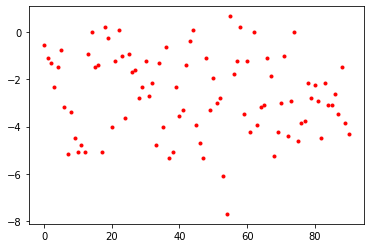

In [41]:
plt.plot(threesigma/lsp, 'r.')

In [38]:
[_, _, _, twosigma, _, _, _] = analyze(twosigma)

result = (-0.00010389949952288314+-6.970075927309746e-06)unit
single measurement std = 6.575556478724208e-05 unit
meets 2 sigma criterium: True
[-2.28887511e-05 -4.57775023e-05 -5.34070860e-05 -9.53697964e-05
 -6.10366697e-05 -3.05183348e-05 -1.29702923e-04 -2.09813552e-04
 -1.37332507e-04 -1.83110009e-04 -2.05998760e-04 -1.94554385e-04
 -2.05998760e-04 -3.81479186e-05  0.00000000e+00 -6.10366697e-05
 -5.72218778e-05 -2.05998760e-04  7.62958371e-06 -1.14443756e-05
 -1.64036050e-04 -4.95922941e-05  3.81479186e-06 -4.19627104e-05
 -1.48776882e-04 -3.81479186e-05 -6.86662534e-05 -6.48514615e-05
 -1.14443756e-04 -9.53697964e-05 -4.95922941e-05 -1.10628964e-04
 -8.77402127e-05 -1.94554385e-04 -5.34070860e-05 -1.64036050e-04
 -2.67035430e-05 -2.17443136e-04 -2.05998760e-04 -9.53697964e-05
 -1.44962091e-04 -1.33517715e-04 -5.72218778e-05 -1.52591674e-05
  3.81479186e-06 -1.60221258e-04 -1.90739593e-04 -2.17443136e-04
 -4.57775023e-05 -1.33517715e-04 -8.01106290e-05 -1.22073339e-04
 -1.1444375

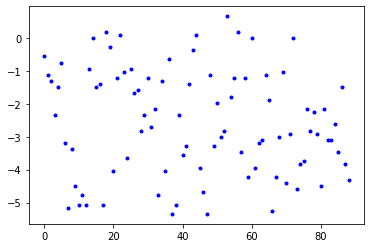

In [42]:
plt.plot(twosigma/lsp, 'b.')

In [48]:
print('Two sigma mean: ' + str(np.mean(twosigma/lsp)))
print('Two sigma std: ' + str(np.std(twosigma/lsp,ddof=1)))

print('Three sigma mean: ' + str(np.mean(threesigma/lsp)))
print('Three sigma std: ' + str(np.std(threesigma/lsp,ddof=1)))

Two sigma mean: -2.5534341002743752
Two sigma std: 1.6160087602112614
Three sigma mean: -2.648760732377155
Three sigma std: 1.7252348760368694


__DUST DATA__

In [50]:
import scipy.io
a = scipy.io.loadmat("dust lagsv2.mat")
dust_lags = a["dust_lags"]
lsr = 24576
lsp = 1/lsr

In [78]:
[IIImu, IIIsigma, IIIsig, twosigma, threesigma, _, _] = analyze(threesigma)

result = (-0.00044749627792877995+-6.703240973520652e-05)unit
single measurement std = 0.000284394428898238 unit
meets 2 sigma criterium: True
[-3.16627724e-04 -5.91292738e-04 -3.37609079e-04 -8.27809833e-04
 -3.05183348e-05 -5.32163464e-04 -9.21272233e-04 -5.18811692e-04
 -9.53697964e-05  2.67035430e-05 -9.42253588e-04 -5.79848362e-04
 -3.31886891e-04 -5.14996900e-04 -4.38701063e-04 -1.29702923e-04
 -6.21811072e-04 -3.50960851e-04]
meets 3 sigma criterium: True
[-3.16627724e-04 -5.91292738e-04 -3.37609079e-04 -8.27809833e-04
 -3.05183348e-05 -5.32163464e-04 -9.21272233e-04 -5.18811692e-04
 -9.53697964e-05  2.67035430e-05 -9.42253588e-04 -5.79848362e-04
 -3.31886891e-04 -5.14996900e-04 -4.38701063e-04 -1.29702923e-04
 -6.21811072e-04 -3.50960851e-04]
meets double sided p criterium: False
[-3.16627724e-04 -5.91292738e-04 -3.37609079e-04 -8.27809833e-04
 -3.05183348e-05 -5.32163464e-04 -5.18811692e-04 -9.53697964e-05
 -5.79848362e-04 -3.31886891e-04 -5.14996900e-04 -4.38701063e-04
 -1.29

In [83]:
print('Three/two sigma mean: ' + str(np.mean(threesigma/lsp)))
print('Three/two sigma std: ' + str(np.std(threesigma/lsp,ddof=1)))

Three/two sigma mean: -10.997668526377698
Three/two sigma std: 6.989277484603098


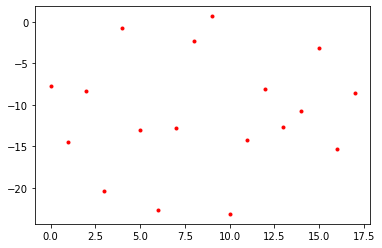

In [79]:
plt.plot(threesigma/lsp, 'r.')

In [75]:
dlags = []
for i in dust_lags[0]:
    if i>-1:
        dlags.append(i)

__ALL DATA__

In [98]:
a = scipy.io.loadmat("wave lagsv2.mat")
lags = a["lags"][0]
data = np.array(lags.tolist() + dlags)

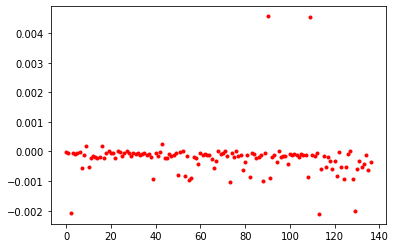

In [99]:
plt.plot(data, 'r.')

In [103]:
[mu, sigma, sig, twosigma, threesigma, _, _] = analyze(data)

result = (-0.00020707080023960796+-5.952056548465814e-05)unit
single measurement std = 0.0006966703575142598 unit
meets 2 sigma criterium: False
[-2.28887511e-05 -4.57775023e-05 -5.34070860e-05 -9.53697964e-05
 -6.10366697e-05 -3.05183348e-05 -5.56959611e-04 -1.29702923e-04
  1.79295217e-04 -5.18811692e-04 -2.09813552e-04 -1.37332507e-04
 -1.83110009e-04 -2.05998760e-04 -1.94554385e-04  1.86924801e-04
 -2.05998760e-04 -3.81479186e-05  0.00000000e+00 -6.10366697e-05
 -5.72218778e-05 -2.05998760e-04  7.62958371e-06 -1.14443756e-05
 -1.64036050e-04 -4.95922941e-05  3.81479186e-06 -4.19627104e-05
 -1.48776882e-04 -3.81479186e-05 -6.86662534e-05 -6.48514615e-05
 -1.14443756e-04 -9.53697964e-05 -4.95922941e-05 -1.10628964e-04
 -8.77402127e-05 -1.94554385e-04 -9.38438796e-04 -5.34070860e-05
 -1.64036050e-04 -2.67035430e-05  2.40331887e-04 -2.17443136e-04
 -2.05998760e-04 -9.53697964e-05 -1.44962091e-04 -1.33517715e-04
 -5.72218778e-05 -7.93476706e-04 -1.52591674e-05  3.81479186e-06
 -8.316246

In [117]:
[IIImu, IIIsigma, IIIsig, twosigma, threesigma, _, _] = analyze(threesigma)

result = (-0.00023702284395622818+-2.409091485995462e-05)unit
single measurement std = 0.00027678353925084646 unit
meets 2 sigma criterium: False
[-2.28887511e-05 -4.57775023e-05 -5.34070860e-05 -9.53697964e-05
 -6.10366697e-05 -3.05183348e-05 -5.56959611e-04 -1.29702923e-04
  1.79295217e-04 -5.18811692e-04 -2.09813552e-04 -1.37332507e-04
 -1.83110009e-04 -2.05998760e-04 -1.94554385e-04  1.86924801e-04
 -2.05998760e-04 -3.81479186e-05  0.00000000e+00 -6.10366697e-05
 -5.72218778e-05 -2.05998760e-04  7.62958371e-06 -1.14443756e-05
 -1.64036050e-04 -4.95922941e-05  3.81479186e-06 -4.19627104e-05
 -1.48776882e-04 -3.81479186e-05 -6.86662534e-05 -6.48514615e-05
 -1.14443756e-04 -9.53697964e-05 -4.95922941e-05 -1.10628964e-04
 -8.77402127e-05 -1.94554385e-04 -5.34070860e-05 -1.64036050e-04
 -2.67035430e-05  2.40331887e-04 -2.17443136e-04 -2.05998760e-04
 -9.53697964e-05 -1.44962091e-04 -1.33517715e-04 -5.72218778e-05
 -1.52591674e-05  3.81479186e-06 -1.60221258e-04 -1.90739593e-04
 -2.17443

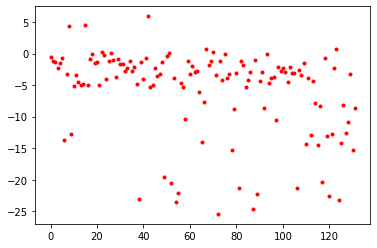

In [118]:
plt.plot(threesigma/lsp, 'r.')

In [123]:
[IImu, IIsigma, IIsig, twosigma, _, _, _] = analyze(twosigma)

result = (-0.00010189185988023401+-6.865599941318593e-06)unit
single measurement std = 6.620944809877024e-05 unit
meets 2 sigma criterium: True
[-2.28887511e-05 -4.57775023e-05 -5.34070860e-05 -9.53697964e-05
 -6.10366697e-05 -3.05183348e-05 -1.29702923e-04 -2.09813552e-04
 -1.37332507e-04 -1.83110009e-04 -2.05998760e-04 -1.94554385e-04
 -2.05998760e-04 -3.81479186e-05  0.00000000e+00 -6.10366697e-05
 -5.72218778e-05 -2.05998760e-04  7.62958371e-06 -1.14443756e-05
 -1.64036050e-04 -4.95922941e-05  3.81479186e-06 -4.19627104e-05
 -1.48776882e-04 -3.81479186e-05 -6.86662534e-05 -6.48514615e-05
 -1.14443756e-04 -9.53697964e-05 -4.95922941e-05 -1.10628964e-04
 -8.77402127e-05 -1.94554385e-04 -5.34070860e-05 -1.64036050e-04
 -2.67035430e-05 -2.17443136e-04 -2.05998760e-04 -9.53697964e-05
 -1.44962091e-04 -1.33517715e-04 -5.72218778e-05 -1.52591674e-05
  3.81479186e-06 -1.60221258e-04 -1.90739593e-04 -2.17443136e-04
 -4.57775023e-05 -1.33517715e-04 -8.01106290e-05 -1.22073339e-04
 -1.1444375

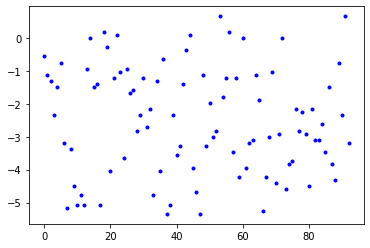

In [124]:
plt.plot(twosigma/lsp, 'b.')

In [125]:
print('Two sigma mean: ' + str(np.mean(twosigma/lsp)))
print('Two sigma std: ' + str(np.std(twosigma/lsp,ddof=1)))

print('Three sigma mean: ' + str(np.mean(threesigma/lsp)))
print('Three sigma std: ' + str(np.std(threesigma/lsp,ddof=1)))

Two sigma mean: -2.5040943484166305
Two sigma std: 1.627163396475377
Three sigma mean: -5.825073413068264
Three sigma std: 6.802232260628803


In [ ]:
####################################################################################################################
#  3 sigma 99.7%
#  2 sigma 95.5%

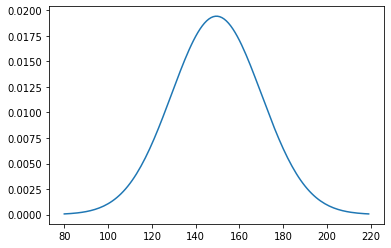

In [17]:
mu = 149.5
sigma = 20.527758983602883
x = np.arange(80,220)
plt.plot(x,prob(x,mu,sigma))

In [18]:
print(mu+sigma*2)
print(mu-sigma*2)

190.55551796720576
108.44448203279424


In [20]:
d= [162, 150, 161, 161, 152, 126, 154, 144, 179]
analyze(d)

result = (154.33333333333334+-4.844813951249544)unit
single measurement std = 14.534441853748634 unit
meets 2 sigma criterium: True
[162 150 161 161 152 126 154 144 179]
meets 3 sigma criterium: True
[162 150 161 161 152 126 154 144 179]
meets double sided p criterium: False
[162 150 161 161 152 154 144]
meets single sided p criterium: True
[162 150 161 161 152 126 154 144 179]


(154.33333333333334,
 14.534441853748634,
 4.844813951249544,
 array([162, 150, 161, 161, 152, 126, 154, 144, 179]),
 array([162, 150, 161, 161, 152, 126, 154, 144, 179]),
 array([162, 150, 161, 161, 152, 154, 144]),
 array([162, 150, 161, 161, 152, 126, 154, 144, 179]))

In [22]:
mu=154.33333333333334
sigma=14.534441853748634
print(mu+sigma*3)
print(mu-sigma*3)

197.93665889457924
110.73000777208745


In [35]:
a=57
sa=1
b=74.5
sb=0.5

a=np.deg2rad(a)
sa=np.deg2rad(sa)
b=np.deg2rad(b)
sb=np.deg2rad(sb)

d= 6.72
sd= 0.03

print(((d*sa)/(np.sin(a) *(1/np.tan(a)))**2 + ((1/np.tan(b))**2)+(d*sb)/(np.sin(b))**2 *(1/np.tan(a))**2 + ((1/np.tan(b))**2)+(sd)/(1/np.tan(a) + 1/np.tan(b)))**2)

0.3699271533945822


In [25]:
np.sqrt(0.3)

0.5477225575051661

In [9]:
### Gauss ###
mu = 0 
sigma = 1

# hustota pravděpodobnosti
def prob(x, mu = 0, sigma = 1):
    return 1/np.sqrt(2*np.pi*sigma**2) * np.exp(-np.square(x-mu)/(2*sigma**2))

# distribuční funkce
def dist(x, mu = 0, sigma = 1):
    return 0.5 * (1 + sps.erf((x-mu)/(np.sqrt(2*sigma**2)))) 


### Cauchy ###

x0 = 0
L = 1

# hustota pravděpodobnosti
def cprob(x, x0=0,L=1):
    return 1/np.pi * L/(L**2+np.square(x-x0))

# distribuční funkce
def cdist(x, x0=0,L=1):
    return 1/np.pi * ((np.pi)/(2) + np.arctan((x-x0)/(L)))

In [3]:
b = np.arange(0,15)
### Binomicke rozdeleni ###

def binom(k, N, p):
    return sps.comb(N,k) * p**k * (1-p)**(N-k)

### Poissonovo rozdělení ###

def poiss(k, v):
    return ((v**k)/(sps.factorial(k)))*np.exp(-v)

In [7]:
k = np.array([8,9,10])
binom(k, 10, 0.904).sum()

0.9365272345199902

In [9]:
binom(10, 10, 0.905)

0.3685409848335519

In [13]:
p3= 0.1e-2
p1=0.904
p = (p3)/(p3+p1)
binom(1,10,p)

0.010940321438470813

In [14]:
p

0.0011049723756906078

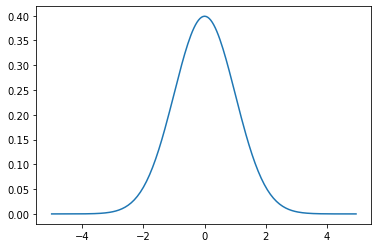

In [3]:
plt.plot(a,prob(a,mu=0,sigma=1))

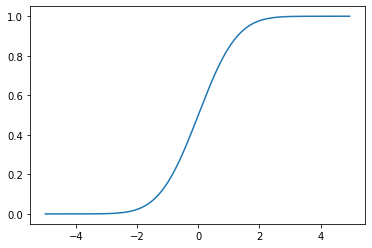

In [4]:
plt.plot(a,dist(a))

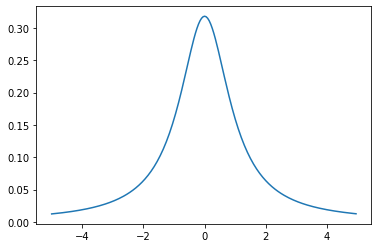

In [5]:
plt.plot(a,cprob(a))

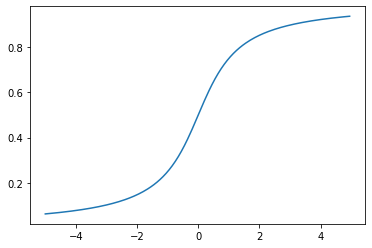

In [6]:
plt.plot(a,cdist(a))

In [8]:
#     k  N   p
binom(10,20,0.5)

0.17619705200195312

In [12]:
#     k  v
poiss(5,12)

0.012740638735861376

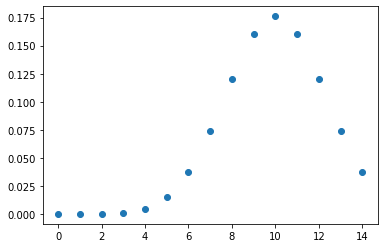

In [29]:
plt.plot(b, binom(b, 20, 0.5),'o')

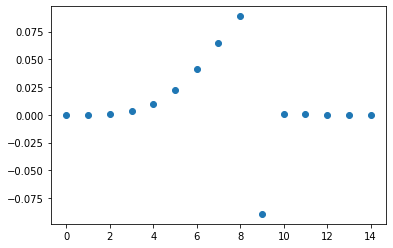

In [41]:
plt.plot(b, poiss(b, 11),'o') #### WATCHOUT FOR OVERFLOW!!!!!!

In [ ]:
### NP.ARANGE(A,B) A-davat od nuly kdyz ma byt od nuly; B-neni zahrnuto!!!!

In [18]:
binom(10,10,9.5e-2)

5.98736939238379e-11